<a href="https://colab.research.google.com/github/NinaMiroslava/Estadistica-Inferencial/blob/main/Tarea_P2_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar librerias con nickname
import numpy as np
import pandas as pd
import scipy as sc
import scipy.stats as scstats
import sympy as sy
from scipy.stats import bernoulli #De scipy.stats importo los numeros bernoulli 
from sympy.abc import x,z #De sympy importo las variables x y z

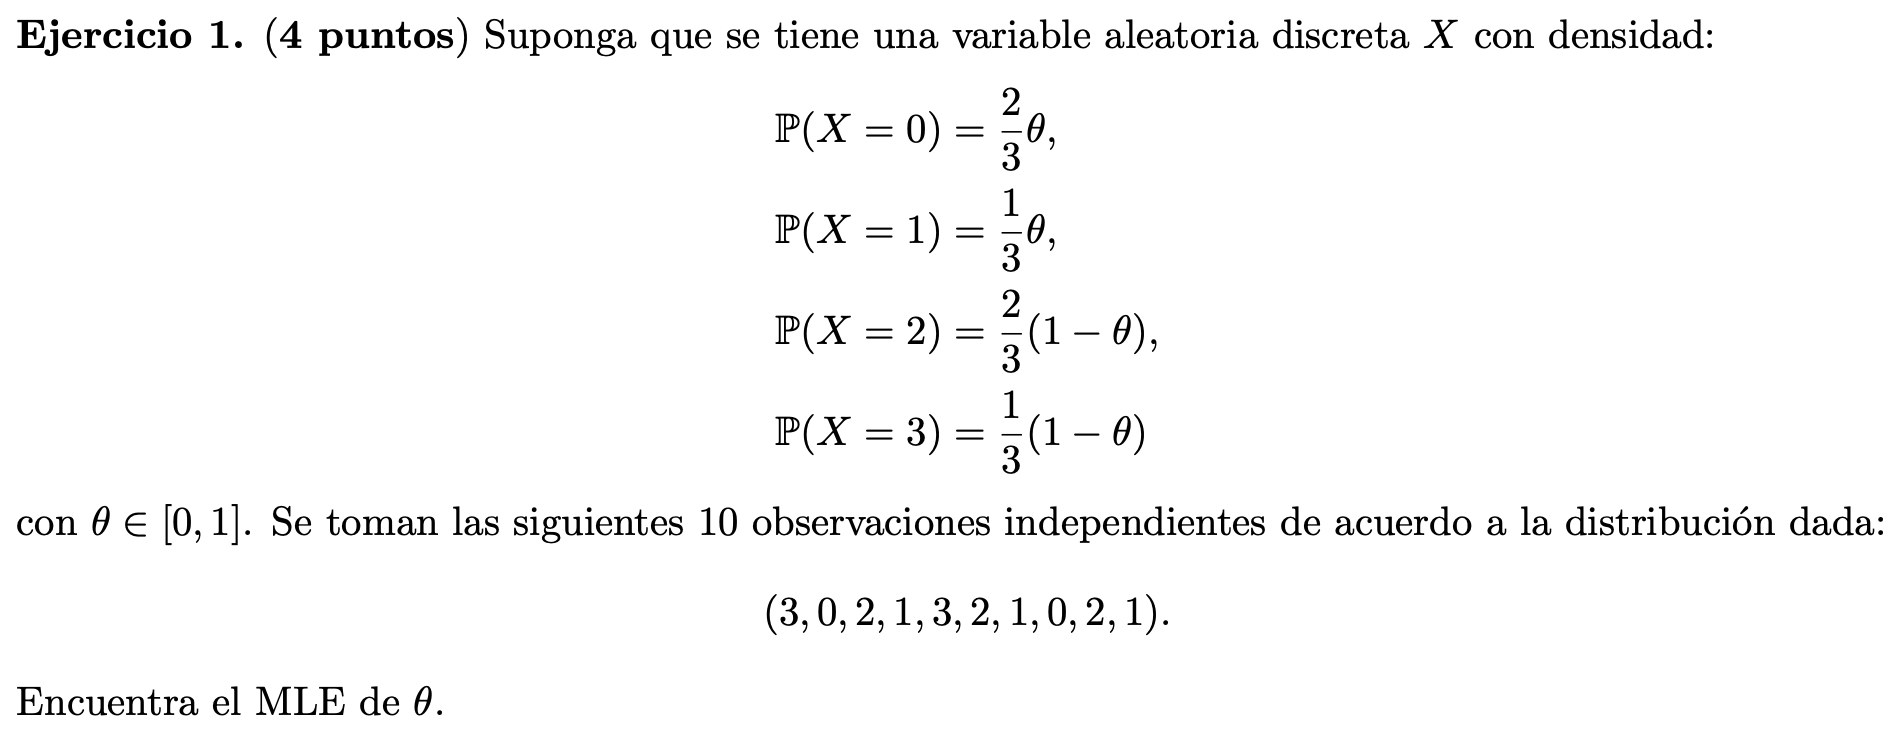

In [ ]:
p = sy.symbols("p", positive = True)

In [ ]:
ModeloMLE= (2*p/3)**2*(p/3)**(3)*(2*(1-p)/3)**3*((1-p)/3)**2
logMLE= sy.expand_log(sy.log(ModeloMLE))
phat = sy.solve(sy.diff(logMLE,p),p)[0]

phat

1/2

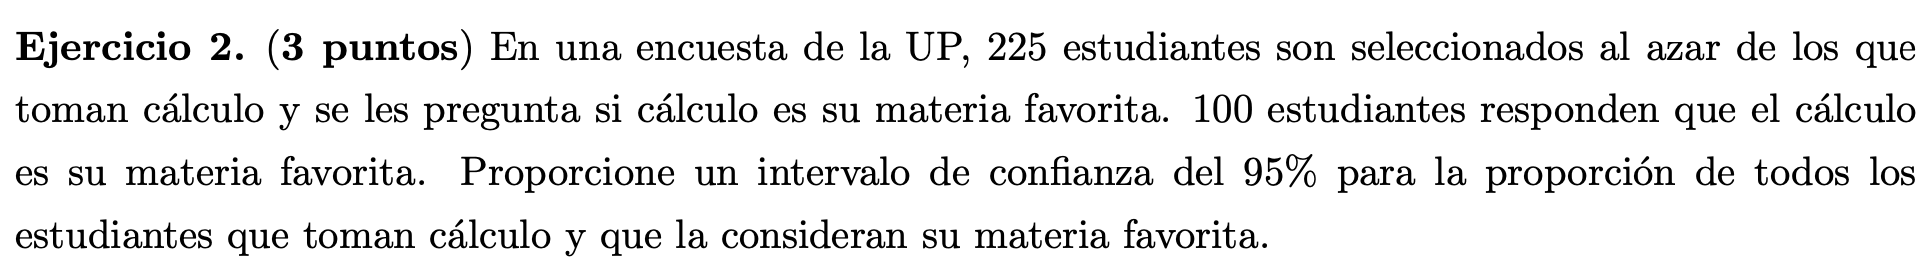

In [ ]:
ProbabilidadCalculoFav=100/225
print(ProbabilidadCalculoFav)

0.4444444444444444


In [ ]:
MuestraEj2=bernoulli(ProbabilidadCalculoFav)
Arreglo2=MuestraEj2.rvs(225)
Arreglo2

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1])

In [ ]:
scstats.norm.interval(alpha=0.95, loc=np.mean(Arreglo2), scale=scstats.sem(Arreglo2))

(0.37937208256701926, 0.5095168063218696)

In [ ]:
scstats.t.interval(alpha=0.95, df=len(Arreglo2)- 1, loc=np.mean(Arreglo2), scale=scstats.sem(Arreglo2))

(0.3790185944840019, 0.509870294404887)

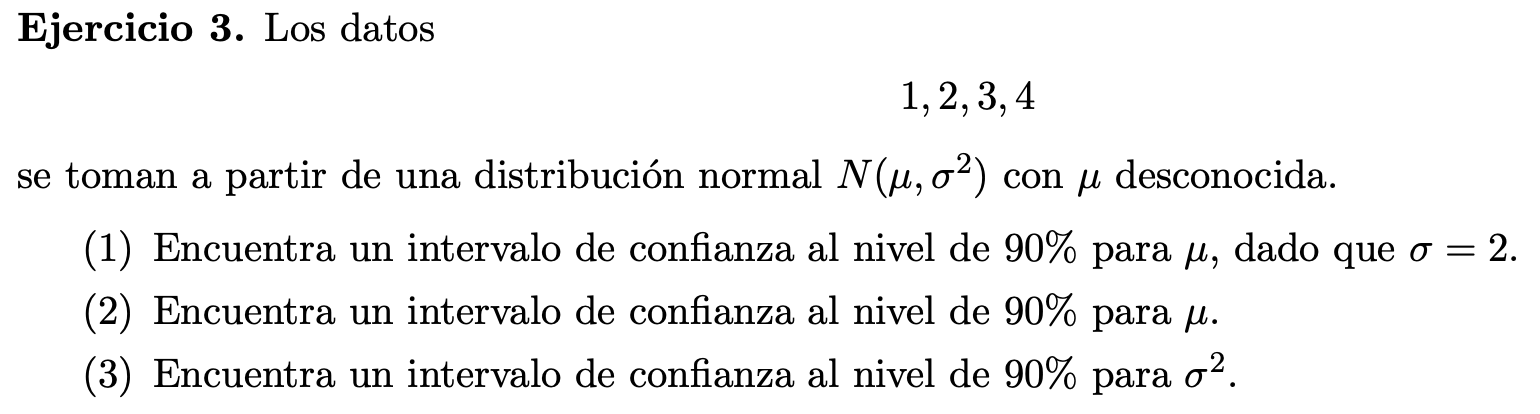

*Miu desconocido
(1) Resolver con z score
(2) Resolver con chi cuadrada
(3) Resolver con T student

In [ ]:
MuestraEj3=np.array([1,2,3,4])

In [ ]:
zscore=scstats.norm.ppf(1-(0.1/2)) #valores criticos para los dos lados de la cola
Ej3Inciso1LimInf=np.mean(MuestraEj3)-zscore*(2/(np.sqrt(4)))
Ej3Inciso1LimSup=np.mean(MuestraEj3)+zscore*(2/(np.sqrt(4)))
print(Ej3Inciso1LimInf,Ej3Inciso1LimSup)

0.8551463730485278 4.144853626951472


In [ ]:
Ej3Inciso2=scstats.t.interval(alpha=0.90, df=len(MuestraEj3)- 1, loc=np.mean(MuestraEj3), scale=scstats.sem(MuestraEj3))
Ej3Inciso2

(0.9809104349065063, 4.019089565093493)

In [ ]:
alpha=0.10
nMuestraEj3=len(MuestraEj3)
s2=np.var(MuestraEj3, ddof=1)
dfEj3=nMuestraEj3-1
upper=(nMuestraEj3-1)*s2/scstats.chi2.ppf(alpha/2,dfEj3)
lower=(nMuestraEj3-1)*s2/scstats.chi2.ppf(1-alpha/2, dfEj3)
print(lower,upper)

0.6398175421974498 14.210749829597594


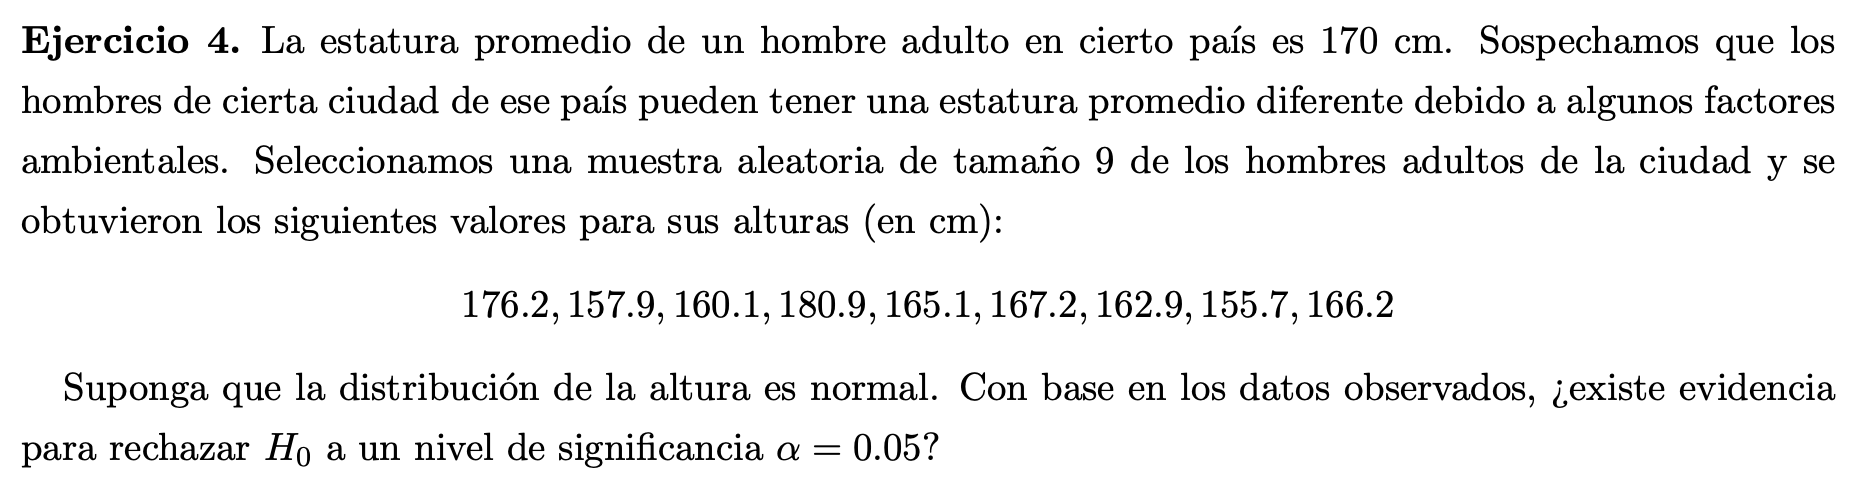

In [ ]:
MuestraEj4=np.array([176.2, 157.9, 160.1, 180.9, 165.1, 167.2, 162.9, 155.7, 166.2])

In [ ]:
PruebaTEj4=scstats.ttest_1samp(MuestraEj4,170)
print(PruebaTEj4)

Ttest_1sampResult(statistic=-1.5278340182609014, pvalue=0.16507440958995132)


Establecimiento de hipotesis:
  
  >> H0 (hipotesis nula): promedio (miu)=170
  
  >> HA (hipotesis alternativa):promedio (miu)=/= 170

De acuerdo con el P Value encontrado con ayuda del estadistico T y tomando en cuenta que nuestro nivel de significancia es a=0.05, **se acepta la hipotesis nula** dado que *a < PValue*

>> 0.05 < 0.165

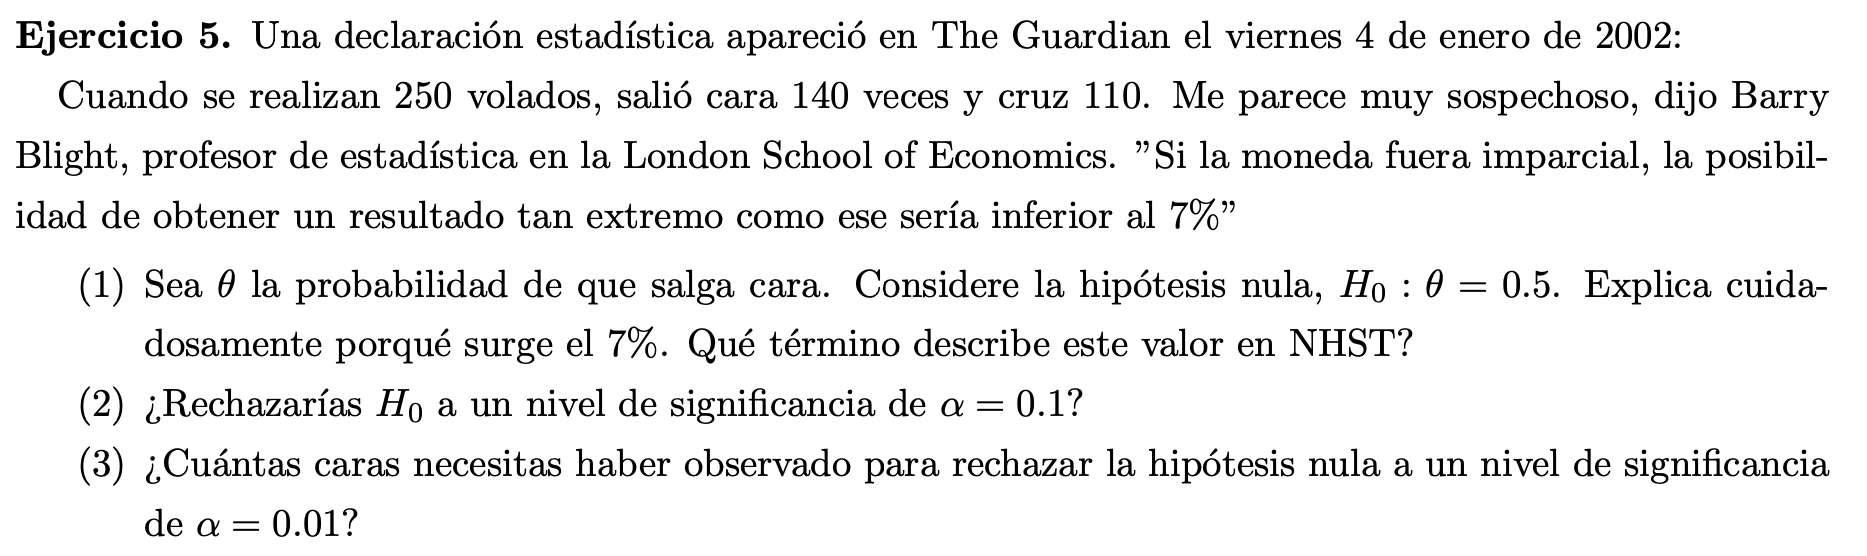

In [ ]:
scstats.binom_test(140,n=250, p=0.5, alternative="two-sided")

0.06642115124004333

( 1) El 7% surge a raiz de una prueba para un binomial de 2 colas para un alfa=0.5 con 250 ensayos (problema anterior). **Se rechaza** la hipotesis nula para una teta=5

(2) **Se acepta** la hipotesis nula para un alfa=0.1 dado que es mayor que el PValue

(3) Se habrían necesitado ver al menos 1 cara para rechazar la hipotesis nula para un nivel de significancia alfa=0.01

In [ ]:
carasProb=scstats.binom_test(140,n=250, p=0.01, alternative="two-sided")
carasProb

5.045051681378542e-208

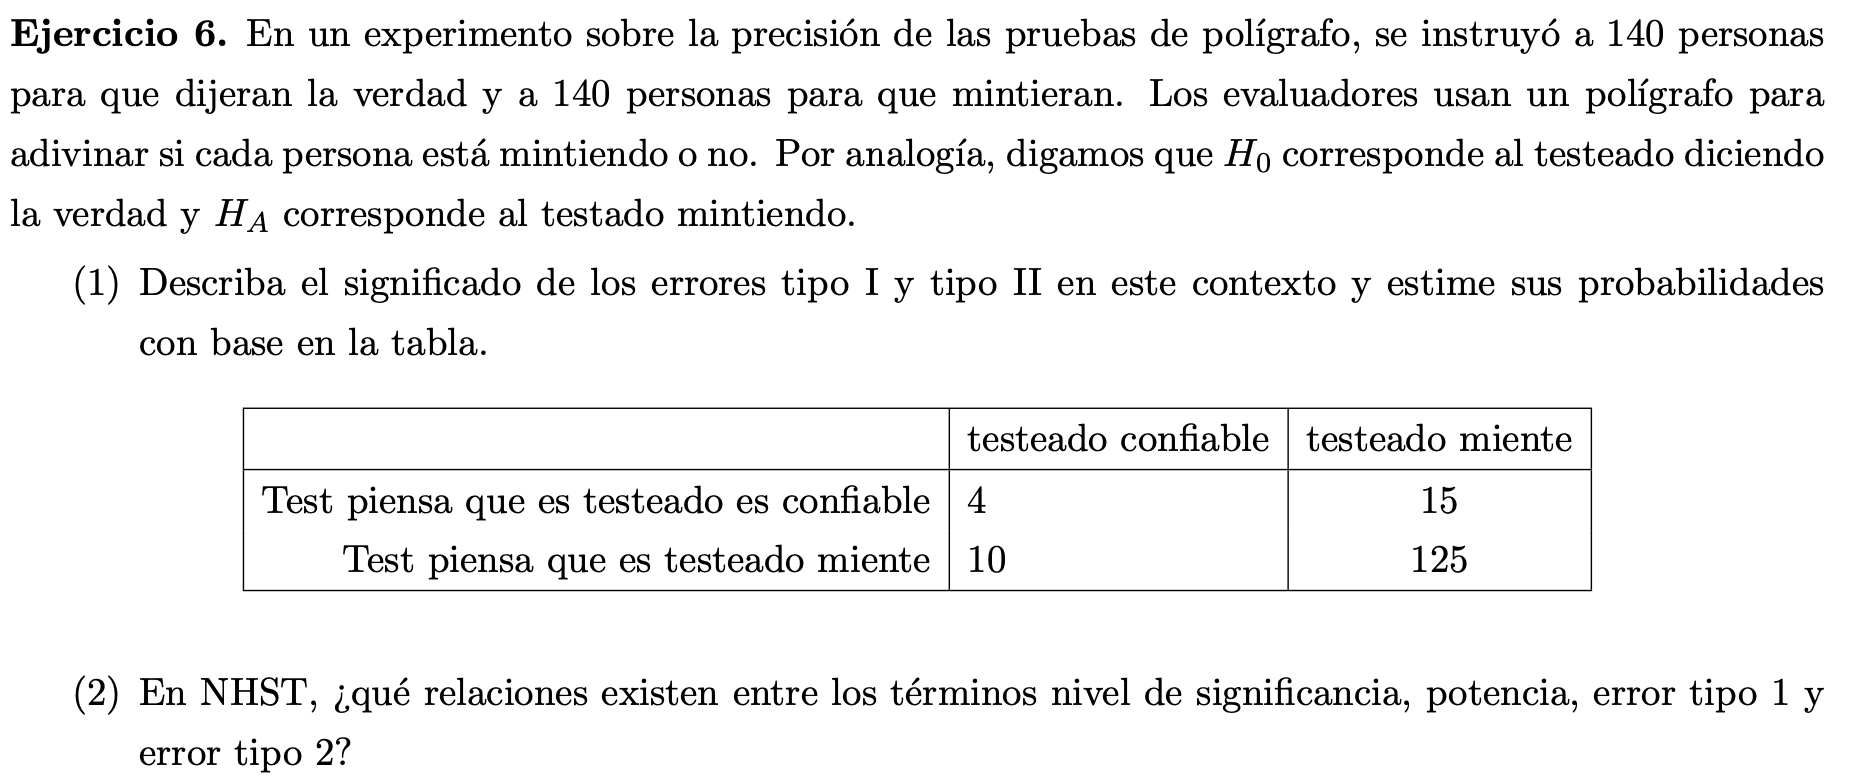

In [ ]:
Probabilidad_E1=10/140
Probabilidad_E1

0.07142857142857142

In [ ]:
Probabilidad_E2=15/140
Probabilidad_E2

0.10714285714285714

(1) El error de tipo 1 consistiria en que dado que el testeado es confiable, que el test piense que el testeado es confiable. La probabilidad de el test piense que el testeado miente es de alfa=10/140 >> 7.14%
El error de tipo 2 consistiria en un falso negativo, y es que el test piense que el testeado miente. Es que se tenga una hipotesis nula sea falsa no se rechace. Dado que la hipotesis nula es falsa y no se rechaza. 

(2) El nivel de significancia es la probabilidad de que el test piense que el testeado miente y es de alfa=10/140, que pasa a ser el nivel de significancia. Por su parte la potencia 1 menos es la probabilidad de que se tenga una hipotesis nula falsa y no se rechace (error de tipo 2)

>1 - probabilidad de error tipo 1 = nivel de significancia


> 1- probabilidad de error tipo 2 = potencia 

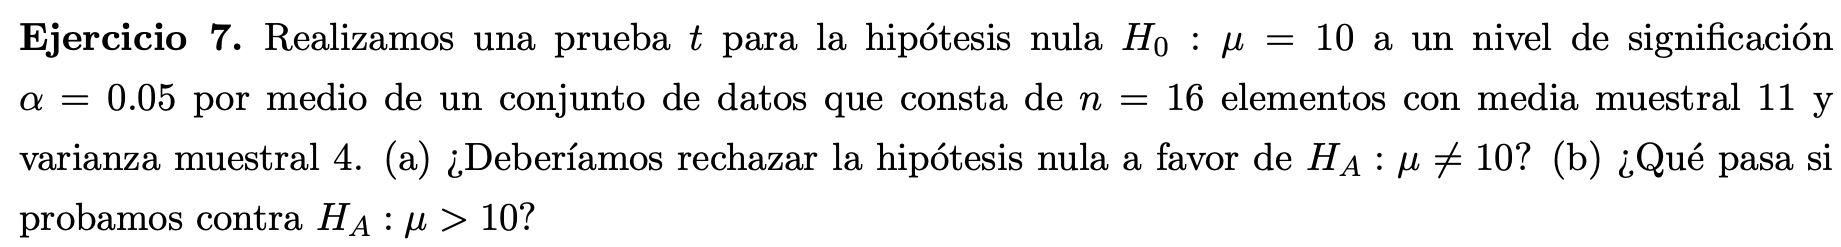

(a) Se acepta la hipotesis alternativa de que miu=/= de 10 porque Miu=11 a un alfa=0.05
(b) Si probamos que Ha= miu > 10 se acepta HA

In [9]:
scstats.t.interval(alpha=0.95, df=16- 1, loc=10, scale=2)

(5.737100908881354, 14.262899091118646)